In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
df=pd.read_csv("drive/MyDrive/dataset_final.csv")
df.tail()

,Label,area_0,area_1,area_2,area_3,area_4
27553,Uninfected,13228.0,0.0,0.0,0.0,0.0
27554,Uninfected,9757.5,0.0,0.0,0.0,0.0
27555,Uninfected,156.0,9927.5,0.0,0.0,0.0
27556,Uninfected,13384.5,0.0,0.0,0.0,0.0
27557,Uninfected,10203.5,0.0,0.0,0.0,0.0


In [3]:
x=df.drop(["Label"],axis=1)
y=df["Label"]
print(x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

        area_0  area_1   area_2  area_3  area_4
0        175.5   126.0    131.0  8902.5     0.0
1        222.0  9847.5      0.0     0.0     0.0
2        179.5   256.5  12413.0     0.0     0.0
3         18.0   187.5   9306.5     0.0     0.0
4        142.5   156.5   6669.5     0.0     0.0
...        ...     ...      ...     ...     ...
27553  13228.0     0.0      0.0     0.0     0.0
27554   9757.5     0.0      0.0     0.0     0.0
27555    156.0  9927.5      0.0     0.0     0.0
27556  13384.5     0.0      0.0     0.0     0.0
27557  10203.5     0.0      0.0     0.0     0.0

[27558 rows x 5 columns]


In [4]:
model=RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(x_train,y_train)
estimator = model.estimators_[5]

In [5]:
prediction=model.predict(x_test)
print(metrics.classification_report(prediction,y_test))

              precision    recall  f1-score   support

 Parasitized       0.89      0.91      0.90      2736
  Uninfected       0.91      0.89      0.90      2776

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512



In [6]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='drive/MyDrive/tree.dot',
                feature_names=["area_0","area_1","area_2","area_3","area_4"],
                class_names=["Parasitized","Uninfected"]
                )

In [7]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'drive/MyDrive/tree.dot', '-o', 'drive/MyDrive/tree.png', '-Gdpi=600'])

0

In [8]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'drive/MyDrive/tree.png')

In [9]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(x_train)
y_test

27556     Uninfected
19775     Uninfected
9774     Parasitized
5900     Parasitized
13294    Parasitized
            ...     
21502     Uninfected
5309     Parasitized
20782     Uninfected
23280     Uninfected
22756     Uninfected
Name: Label, Length: 5512, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(['Uninfected','Parasitized'])
print(list(le.classes_))
y_test_labelled=le.transform(y_test)
y_test_labelled=1-y_test_labelled
y_test_labelled

#predictions_test = le.inverse_transform(y_test_labelled)
#predictions_test

['Parasitized', 'Uninfected']


array([0, 0, 1, ..., 0, 0, 0])

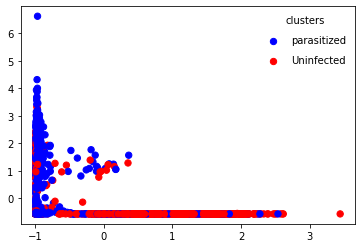

In [11]:
colours=np.array(['red','blue'])
plt.scatter(x_test[:,0],x_test[:,1],c=colours[y_test_labelled],s=40)
plt.scatter([],[],c="blue",label="parasitized",s=40)
plt.scatter([],[],c="red",label="Uninfected",s=40)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='clusters')

In [12]:
y_test_predicted=kmeans.predict(x_test)
y_test_predicted

#predictions_test = le.inverse_transform(y_test_predicted)
#predictions_test

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

Text(0.5, 1.0, 'model after applying k means clustering')

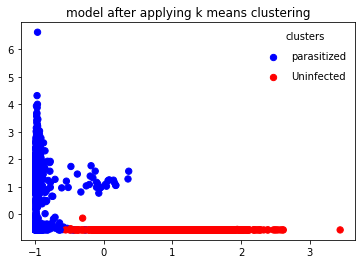

In [13]:


plt.scatter(x_test[:,0],x_test[:,1],c=colours[y_test_predicted],s=40)
plt.scatter([],[],c="blue",label="parasitized",s=40)
plt.scatter([],[],c="red",label="Uninfected",s=40)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='clusters')

plt.title('model after applying k means clustering')



In [14]:

print(metrics.classification_report(y_test_predicted,y_test_labelled))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2774
           1       0.89      0.91      0.90      2738

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

